# Cardio Good Fitness Case Study -Descriptive Statistics

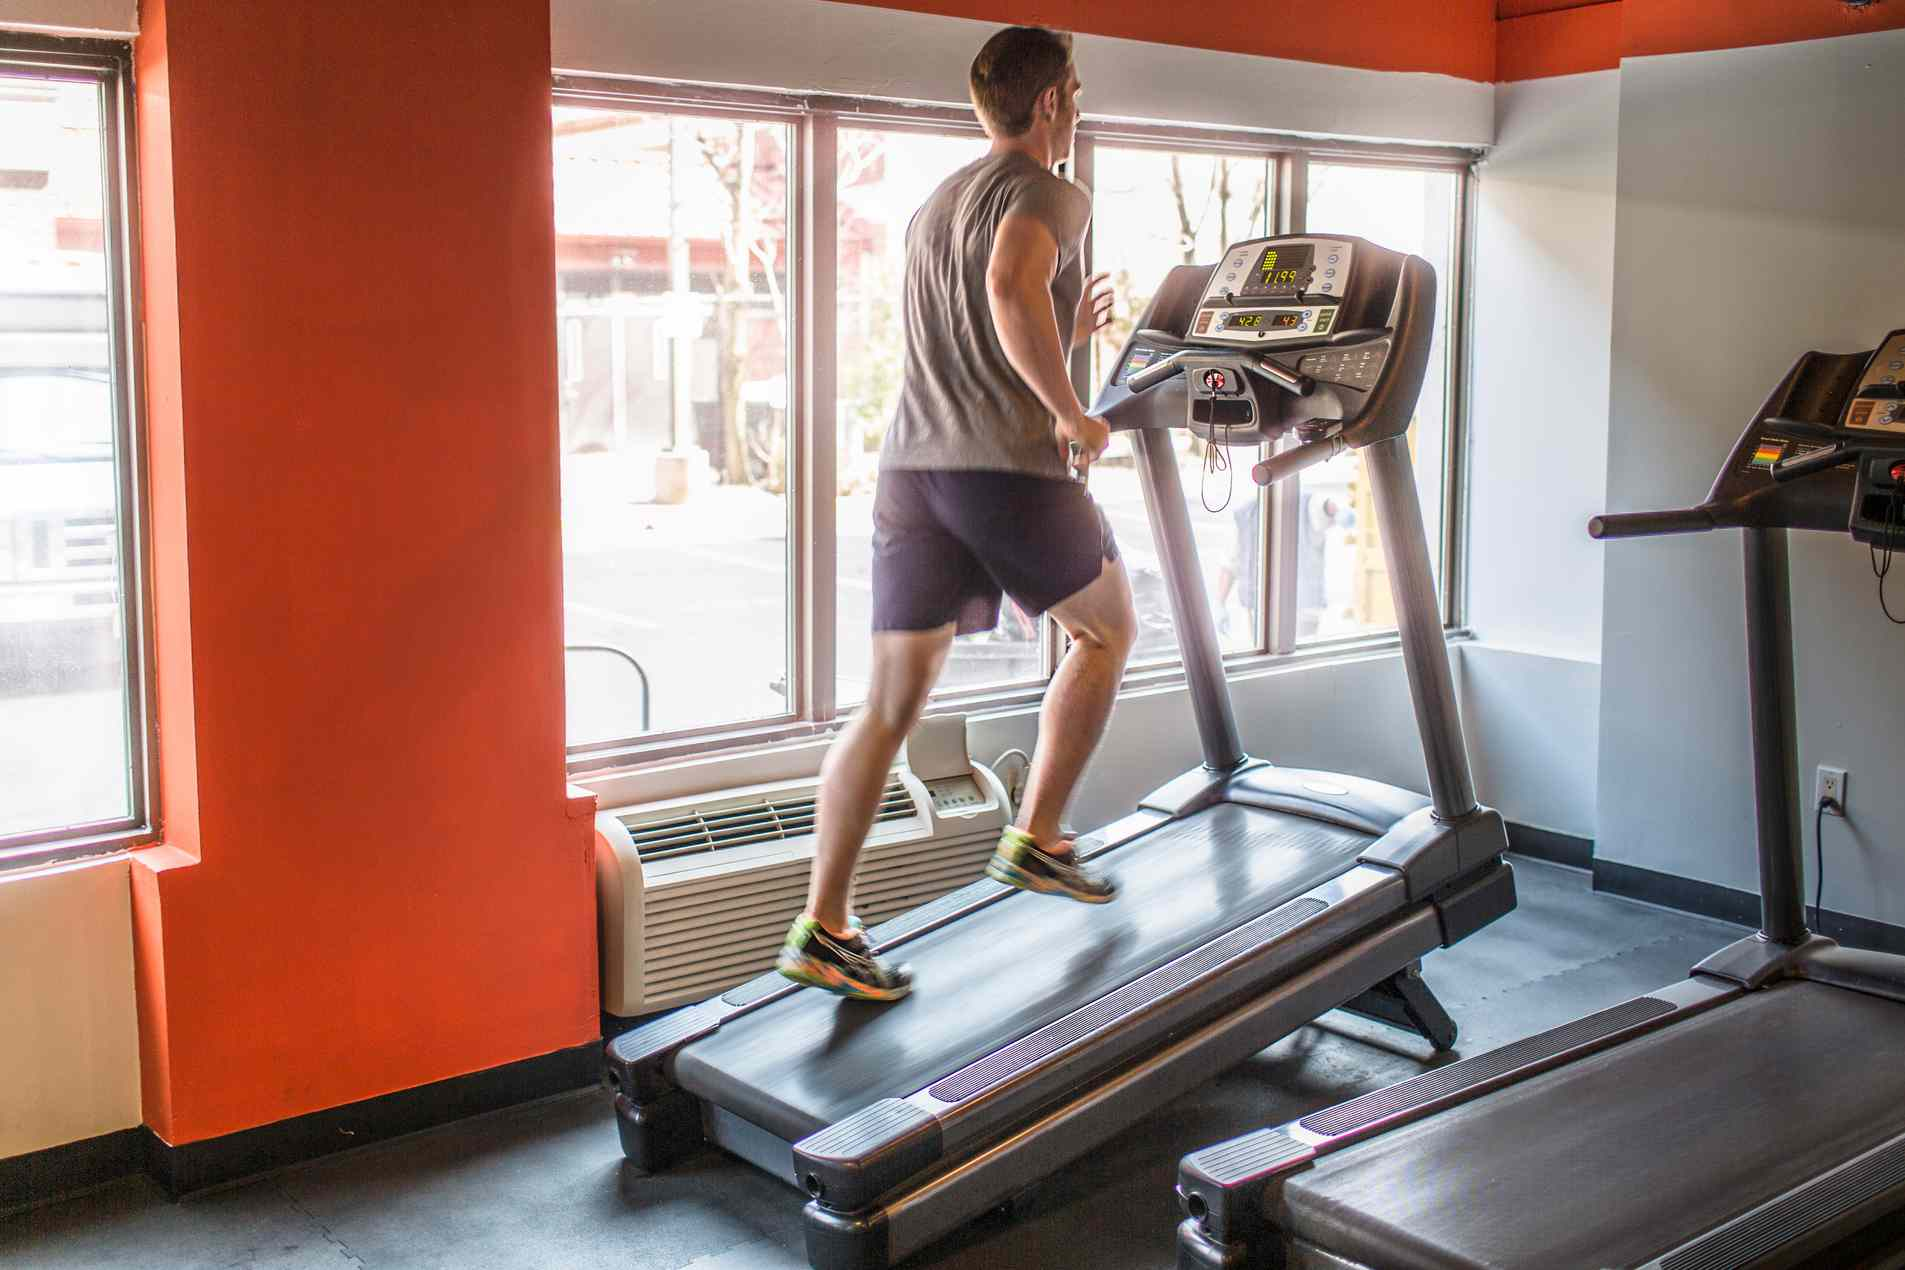

In [1]:
# install the dependencies
import pandas as pd
import numpy as np
import seaborn as sns 
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor    
from sklearn.metrics import accuracy_score
from sklearn import metrics
plt.style.use('bmh')

In [2]:
# Load the data
cardio_data=pd.read_csv("C:\\Users\\Pranav\\Desktop\\DATA SCIENCE DATA\\CVC file\\CardioGoodFitness.csv")

In [3]:
cardio_data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [4]:
#to see the last five rows
cardio_data.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120
179,TM798,48,Male,18,Partnered,4,5,95508,180


In [5]:
# shape of dataset
cardio_data.shape

(180, 9)

In [6]:
# information about dataset
cardio_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [8]:
#Describe of dataset
cardio_data.describe(include="all")

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,TM195,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


In [9]:
# find ot null value in dataset
cardio_data.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [10]:
# index of dataset
cardio_data.index

RangeIndex(start=0, stop=180, step=1)

In [11]:
# Dtypes of dataset
cardio_data.dtypes.dtypes

dtype('O')

## Visualization

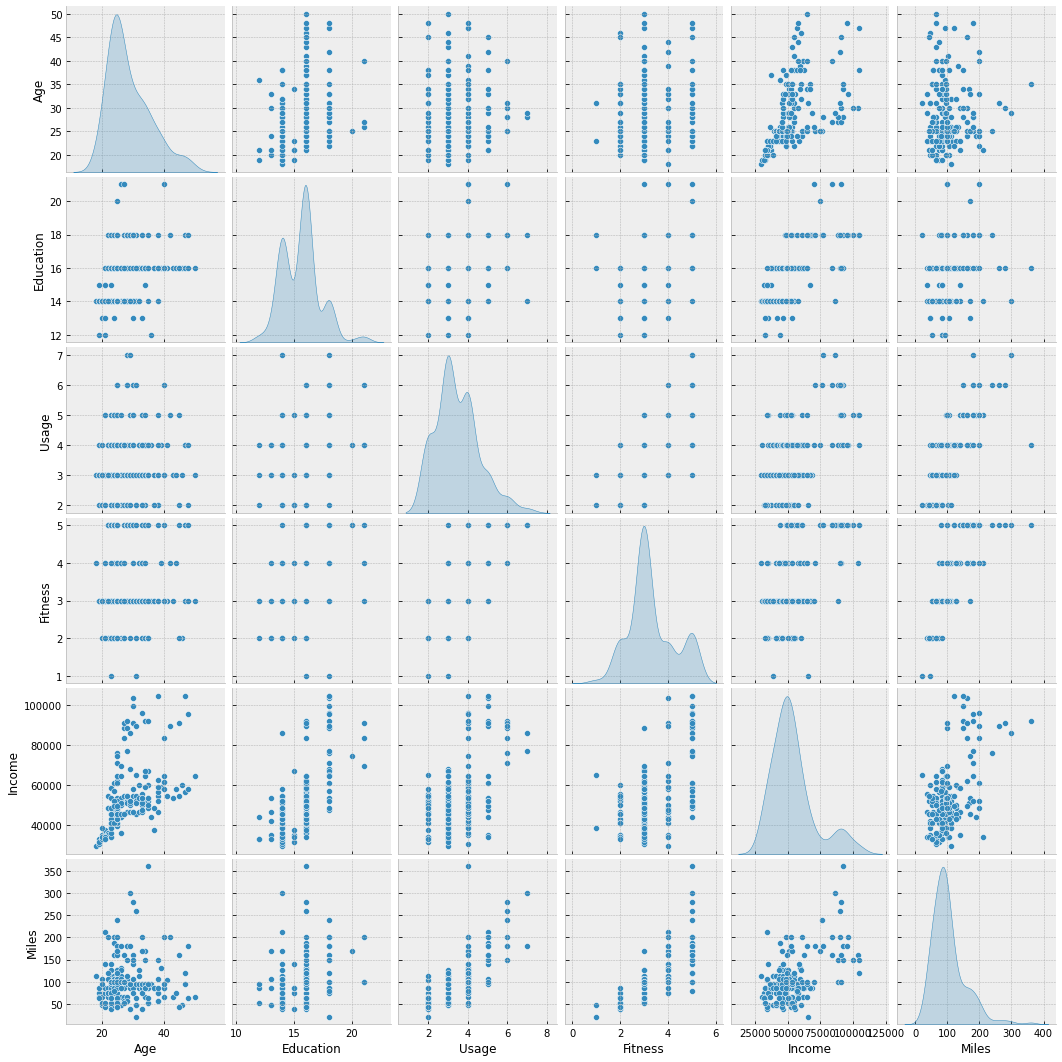

In [13]:
# Pairplot
sns.pairplot(cardio_data, diag_kind="kde");

In [14]:
correlation = cardio_data.corr()
#Creates a 2D matrix with correlation plots
correlation

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


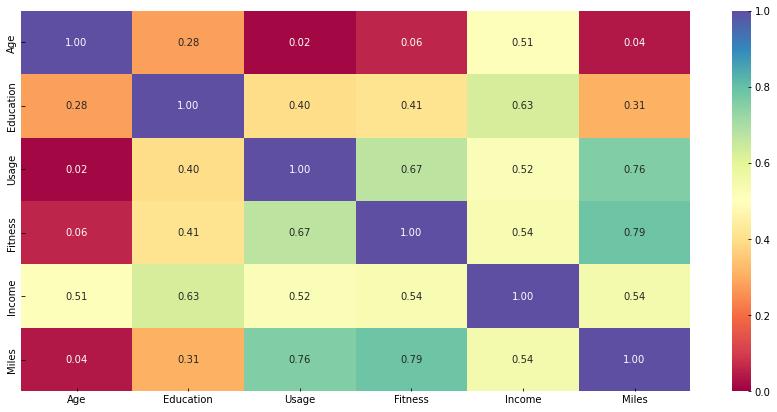

In [15]:
#Displays our correlation plot through a heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(correlation, annot=True, vmin=0, vmax=1, fmt=".2f", cmap="Spectral");

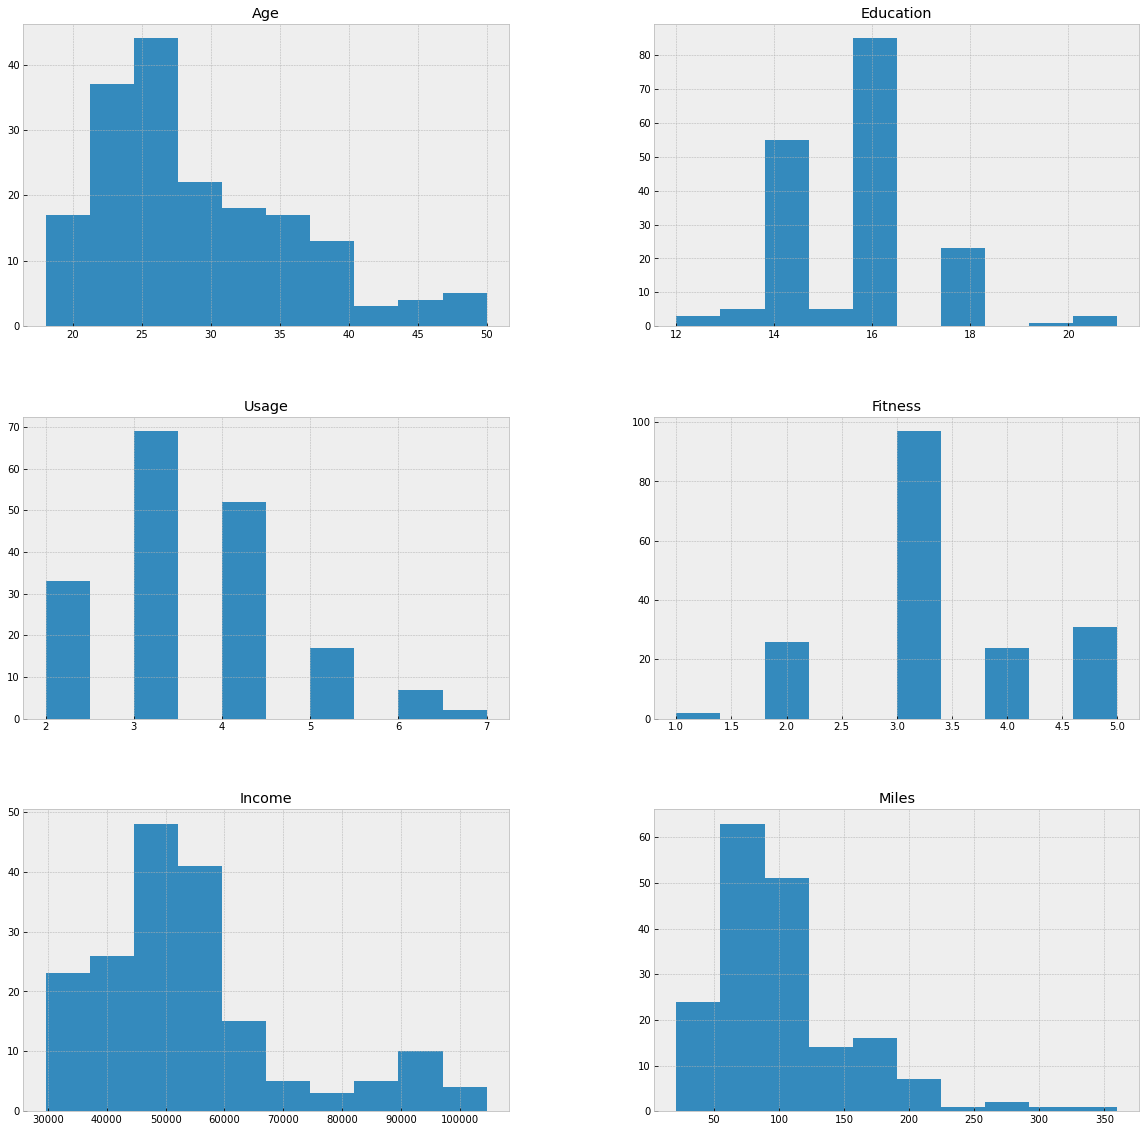

In [17]:
%matplotlib inline
cardio_data.hist(figsize=(20,20))
plt.show()

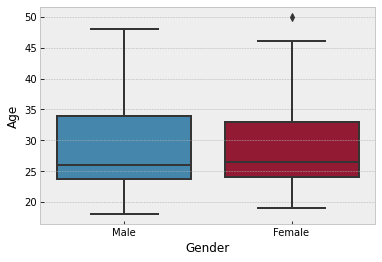

In [19]:
# Boxplot
sns.boxplot(x="Gender",y="Age",data=cardio_data)
plt.show()

In [20]:
pd.crosstab(cardio_data['Product'],cardio_data['Gender'])

Gender,Female,Male
Product,,
TM195,40,40
TM498,29,31
TM798,7,33


In [21]:
pd.crosstab(cardio_data['Product'],cardio_data['MaritalStatus'])

MaritalStatus,Partnered,Single
Product,,
TM195,48,32
TM498,36,24
TM798,23,17


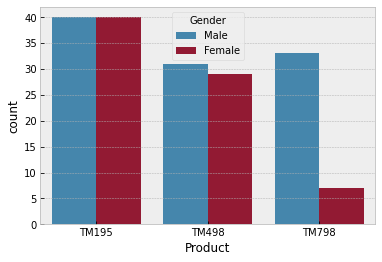

In [24]:
# Countplot
sns.countplot(x="Product",hue="Gender",data=cardio_data)
plt.show()

In [25]:
pd.pivot_table(cardio_data,index=["Product","Gender"],
                              columns=["MaritalStatus"])

Age             Education              Fitness  \
MaritalStatus   Partnered     Single  Partnered     Single Partnered   
Product Gender                                                         
TM195   Female  28.333333  28.692308  14.888889  15.538462  2.851852   
        Male    31.380952  25.631579  15.428571  14.473684  2.857143   
TM498   Female  30.000000  28.142857  15.200000  15.214286  2.933333   
        Male    30.380952  25.200000  15.285714  14.500000  2.904762   
TM798   Female  29.000000  24.333333  17.500000  18.333333  5.000000   
        Male    30.000000  28.928571  17.421053  16.928571  4.631579   

                                Income                     Miles              \
MaritalStatus     Single     Partnered        Single   Partnered      Single   
Product Gender                                                                 
TM195   Female  2.923077  46153.777778  45742.384615   74.925926   78.846154   
        Male    3.263158  50028.000000  43265.842105   80.190476   99.526316   
TM498   Female  2.785714  49724.800000  48920.357143   94.000000   80.214286   
        Male    3.000000  49378.285714  47071.800000   87.238095   91.100000   
TM798   Female  4.000000  84972.250000  58516.000000  215.000000  133.333333   
        Male    4.642857  81431.368421  68216.428571  176.315789  147.571429   

                   Usage            
MaritalStatus  Partnered    Single  
Product Gender                      
TM195   Female  2.851852  3.000000  
        Male    3.285714  3.263158  
TM498   Female  3.333333  2.928571  
        Male    2.857143  3.300000  
TM798   Female  5.250000  4.666667  
        Male    4.842105  4.571429

In [26]:
pd.pivot_table(cardio_data,'Income',index=["Product","Gender"],
                              columns=["MaritalStatus"])

MaritalStatus      Partnered        Single
Product Gender                            
TM195   Female  46153.777778  45742.384615
        Male    50028.000000  43265.842105
TM498   Female  49724.800000  48920.357143
        Male    49378.285714  47071.800000
TM798   Female  84972.250000  58516.000000
        Male    81431.368421  68216.428571

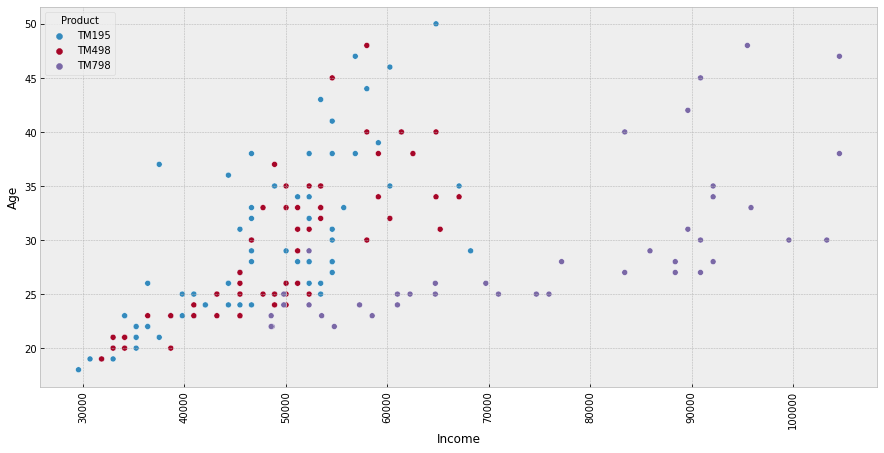

In [30]:
# Scatterplot
plt.figure(figsize=(15, 7))
sns.scatterplot(x="Income", y="Age", data=cardio_data, ci=None, hue='Product')
plt.xticks(rotation=90)
plt.show()